In [ ]:
import pandas as pd
import numpy as np
glassdata=pd.read_csv('/content/glass.csv')
glassdata.describe()
#glassdata.head()
#glassdata.tail()
print(np.unique(glassdata['Type']))

[1 2 3 5 6 7]


In [ ]:
print((glassdata['Ba']==0).sum()/len(glassdata))
print((glassdata['Fe']==0).sum()/len(glassdata))

0.822429906542056
0.6728971962616822


In [ ]:
glassdata.drop('Ba',axis=1,inplace=True)
print(glassdata)

          RI     Na    Mg    Al     Si     K    Ca   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0     1
..       ...    ...   ...   ...    ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  0.0     7

[214 rows x 9 columns]


In [ ]:
glassdata.drop('Fe',axis=1,inplace=True)
print(glassdata)

          RI     Na    Mg    Al     Si     K    Ca  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07     1
..       ...    ...   ...   ...    ...   ...   ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62     7

[214 rows x 8 columns]


In [ ]:
from sklearn.model_selection import train_test_split
Y=glassdata.iloc[:,-1]
X=glassdata.iloc[:,:-1]
#print(Y)
#print(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
#print(X_train)
#print(X_test)
#print(Y_train)
print(Y_test)
print(len(Y_test))

9      1
197    7
66     1
191    7
117    2
111    2
15     1
86     2
75     2
144    2
182    6
170    5
141    2
73     2
178    6
167    5
190    7
18     1
45     1
184    6
98     2
209    7
211    7
195    7
148    3
104    2
30     1
25     1
175    5
16     1
55     1
138    2
158    3
93     2
69     1
203    7
171    5
152    3
97     2
84     2
101    2
200    7
60     1
Name: Type, dtype: int64
43


array([[<Axes: xlabel='RI', ylabel='RI'>,
        <Axes: xlabel='Na', ylabel='RI'>,
        <Axes: xlabel='Mg', ylabel='RI'>,
        <Axes: xlabel='Al', ylabel='RI'>,
        <Axes: xlabel='Si', ylabel='RI'>,
        <Axes: xlabel='K', ylabel='RI'>,
        <Axes: xlabel='Ca', ylabel='RI'>],
       [<Axes: xlabel='RI', ylabel='Na'>,
        <Axes: xlabel='Na', ylabel='Na'>,
        <Axes: xlabel='Mg', ylabel='Na'>,
        <Axes: xlabel='Al', ylabel='Na'>,
        <Axes: xlabel='Si', ylabel='Na'>,
        <Axes: xlabel='K', ylabel='Na'>,
        <Axes: xlabel='Ca', ylabel='Na'>],
       [<Axes: xlabel='RI', ylabel='Mg'>,
        <Axes: xlabel='Na', ylabel='Mg'>,
        <Axes: xlabel='Mg', ylabel='Mg'>,
        <Axes: xlabel='Al', ylabel='Mg'>,
        <Axes: xlabel='Si', ylabel='Mg'>,
        <Axes: xlabel='K', ylabel='Mg'>,
        <Axes: xlabel='Ca', ylabel='Mg'>],
       [<Axes: xlabel='RI', ylabel='Al'>,
        <Axes: xlabel='Na', ylabel='Al'>,
        <Axes: xlabel='Mg', ylabel

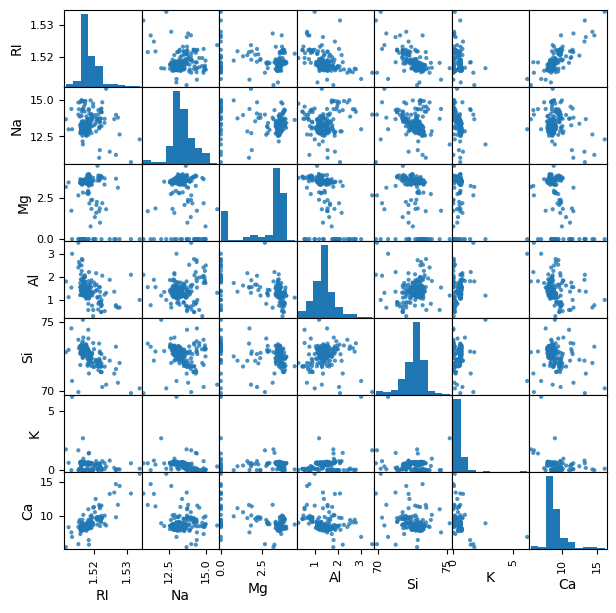

In [ ]:
pd.plotting.scatter_matrix(X_train,alpha=0.8,figsize=(7,7),)



In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='linear',C=0.8)
model.fit(X_train,Y_train)
Y_predict=model.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_predict))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_predict))
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

0.6744186046511628
[[10  1  0  0  0  0]
 [ 4  9  0  0  0  1]
 [ 1  2  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  1  0  1  1  0]
 [ 0  1  0  0  0  7]]
              precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           2       0.56      0.64      0.60        14
           3       0.00      0.00      0.00         3
           5       0.67      0.50      0.57         4
           6       1.00      0.33      0.50         3
           7       0.88      0.88      0.88         8

    accuracy                           0.67        43
   macro avg       0.63      0.54      0.55        43
weighted avg       0.65      0.67      0.64        43



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
social_network_data=pd.read_csv('/content/Social_Network_Ads.csv')
social_network_data.describe()
social_network_data.head()
print(pd.unique(social_network_data['Purchased']))
social_network_data.tail()

X=social_network_data.iloc[:,[1,2,3]].values
print(X)
Y=social_network_data.iloc[:,-1].values
print(Y)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,0]=le.fit_transform(X[:,0])
print(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)


[0 1]
[['Male' 19 19000]
 ['Male' 35 20000]
 ['Female' 26 43000]
 ...
 ['Female' 50 20000]
 ['Male' 36 33000]
 ['Female' 49 36000]]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]
[[1 19 19000]
 [1 35 20000]
 [0 26 43000]
 ...
 [0 50 20

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
print(X_train)

[[ 1.02166316 -0.84252154  0.1301563 ]
 [-0.97879618  0.04175763  0.2777019 ]
 [ 1.02166316  0.72953032 -1.31579061]
 [-0.97879618  1.61380949  1.10395728]
 [ 1.02166316  0.82778356 -1.40431797]
 [-0.97879618 -1.43204099 -1.25677236]
 [ 1.02166316 -0.05649561  0.1301563 ]
 [ 1.02166316  0.43477059 -0.16493491]
 [-0.97879618 -0.2530021   0.01211982]
 [-0.97879618  1.31904976  2.22530386]
 [ 1.02166316  0.14001087  0.74984783]
 [-0.97879618 -1.33378775  0.54328399]
 [-0.97879618  2.00682245  0.72033871]
 [ 1.02166316 -1.23553451 -1.43382709]
 [ 1.02166316  0.33651735 -0.34198963]
 [ 1.02166316 -0.94077478  0.54328399]
 [-0.97879618  0.43477059  0.2777019 ]
 [-0.97879618  0.43477059  1.10395728]
 [-0.97879618  0.82778356  0.74984783]
 [-0.97879618  0.9260368   1.25150288]
 [-0.97879618 -0.44950858 -1.25677236]
 [ 1.02166316 -1.82505395 -1.34529973]
 [ 1.02166316  1.12254328  0.54328399]
 [-0.97879618 -0.64601506 -1.64039093]
 [-0.97879618 -0.7442683   0.24819278]
 [ 1.02166316  1.02429004

In [ ]:
X_test=sc.transform(X_test)
print(X_test)

[[-0.97879618  0.82778356 -1.43382709]
 [-0.97879618  2.10507569  0.51377487]
 [-0.97879618 -0.94077478 -0.78462644]
 [-0.97879618  1.02429004  0.74984783]
 [-0.97879618 -0.84252154 -1.25677236]
 [-0.97879618 -0.7442683  -0.25346227]
 [-0.97879618  0.9260368   1.07444816]
 [-0.97879618 -0.84252154  0.36622926]
 [ 1.02166316  0.23826411  0.1301563 ]
 [ 1.02166316  0.43477059 -0.16493491]
 [-0.97879618 -0.2530021  -0.16493491]
 [-0.97879618  1.51555624 -1.07971764]
 [-0.97879618 -1.43204099 -0.66658995]
 [-0.97879618 -1.72680071 -1.40431797]
 [ 1.02166316 -0.7442683   0.48426575]
 [ 1.02166316 -0.2530021   1.10395728]
 [-0.97879618  1.417303   -0.96168116]
 [-0.97879618  0.82778356  0.10064718]
 [ 1.02166316  0.14001087 -0.84364468]
 [ 1.02166316  1.81031597 -0.31248051]
 [-0.97879618 -1.53029423 -1.28628149]
 [ 1.02166316 -0.84252154  0.2777019 ]
 [ 1.02166316  0.9260368  -1.40431797]
 [-0.97879618  2.10507569  0.15966542]
 [ 1.02166316 -1.82505395 -1.52235445]
 [ 1.02166316  1.31904976

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1)
Classifier.fit(X_train,Y_train)
Y_predict=Classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_predict))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_predict))
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

0.9166666666666666
[[68  5]
 [ 5 42]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        73
           1       0.89      0.89      0.89        47

    accuracy                           0.92       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



In [ ]:
from sklearn.ensemble import RandomForestClassifier
Classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
Classifier.fit(X_train,Y_train)
Y_predict=Classifier.predict(X_test)
print(accuracy_score(Y_test,Y_predict))
print(confusion_matrix(Y_test,Y_predict))
print(classification_report(Y_test,Y_predict))

0.9
[[68  5]
 [ 7 40]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        73
           1       0.89      0.85      0.87        47

    accuracy                           0.90       120
   macro avg       0.90      0.89      0.89       120
weighted avg       0.90      0.90      0.90       120



In [ ]:
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)
Classifier.fit(X_train,Y_train)
Y_predict=Classifier.predict(X_test)
print(accuracy_score(Y_test,Y_predict))
print(confusion_matrix(Y_test,Y_predict))
print(classification_report(Y_test,Y_predict))



0.9333333333333333
[[67  6]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        73
           1       0.88      0.96      0.92        47

    accuracy                           0.93       120
   macro avg       0.93      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120

